In [1]:
from PIL import Image 
import imageio
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.feature import hog
from skimage import exposure
import cv2
%matplotlib inline

**Task 2**

In [2]:
#Task-2 1
file1 = "images/image1.jpg"
img1 = Image.open(file1)
new_image1 = img1.resize((1024, 720))
new_image1.save('image1.jpg')

file2 = "images/image2.jpg"
img2 = Image.open(file2)
new_image2 = img2.resize((1024, 720))
new_image2.save('image2.jpg')

file3 = "images/image3.jpg"
img3 = Image.open(file3)
new_image3 = img3.resize((1024, 720))
new_image3.save('image3.jpg')

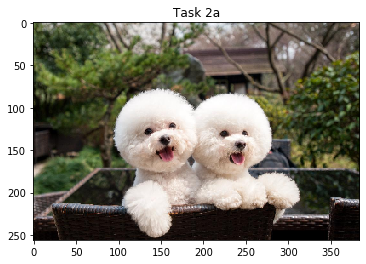

In [3]:
#Task-2 a
image = cv2.imread('image1.jpg')
image = cv2.resize(image,(384,256))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.title('Task 2a');

In [4]:
#Task-2 b 
red_channel_image = image[:, :, 0]
blue_channel_image = image[:, :, 1]
green_channel_image = image[:, :, 2]

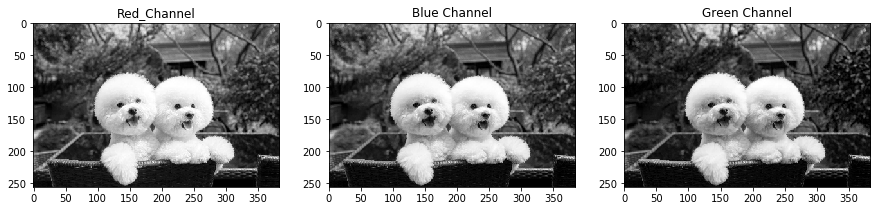

In [5]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(131)
plt.title('Red_Channel')
plt.imshow(red_channel_image,cmap='gray')

fig.add_subplot(132)
plt.title('Blue Channel')
plt.imshow(blue_channel_image,cmap='gray')

fig.add_subplot(133)
plt.title('Green Channel')
plt.imshow(green_channel_image,cmap='gray');

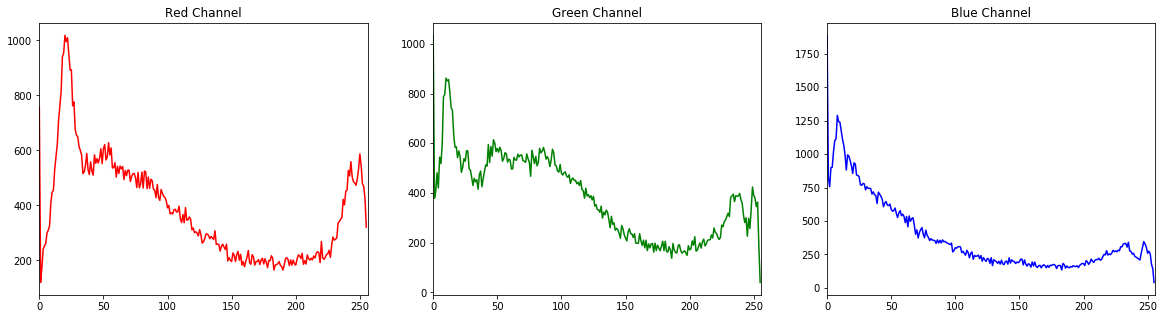

In [6]:
#Task-2 c 
fig = plt.figure(figsize=(20,5))

fig.add_subplot(131)
hist = cv2.calcHist([image],[0],None, [256], [0, 256])
plt.xlim([0, 256])
plt.plot(hist, color = 'r')
plt.title('Red Channel')

fig.add_subplot(132)
hist = cv2.calcHist([image], [1], None, [256], [0, 256])
plt.plot(hist, color = 'g')
plt.xlim([0, 256])
plt.title('Green Channel')

fig.add_subplot(133)
hist = cv2.calcHist([image], [2], None, [256], [0, 256])
plt.plot(hist, color = 'b')
plt.xlim([0, 256])
plt.title('Blue Channel');

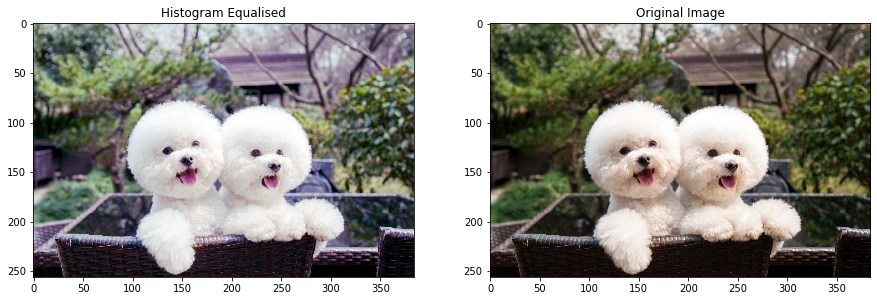

In [7]:
#Task 2-d
fig = plt.figure(figsize=(15,15))
R, G, B = cv2.split(image)

red_channel = cv2.equalizeHist(R)
blue_channel = cv2.equalizeHist(G)
green_channel = cv2.equalizeHist(B)

equ = cv2.merge((red_channel, blue_channel, green_channel))
fig.add_subplot(121)
plt.imshow(equ);
plt.title('Histogram Equalised');

fig.add_subplot(122)
plt.imshow(image);
plt.title('Original Image');

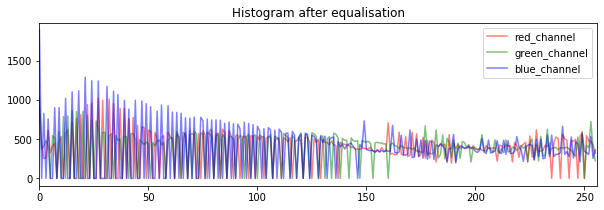

In [8]:
fig = plt.figure(figsize=(10,3))
hist = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.plot(hist, color = 'r',alpha=0.5,label='red_channel')

hist = cv2.calcHist([equ], [1], None, [256], [0, 256])
plt.plot(hist, color = 'g',alpha=0.5,label='green_channel')

hist = cv2.calcHist([equ], [2], None, [256], [0, 256])
plt.plot(hist, color = 'b',alpha=0.5,label='blue_channel')
plt.title('Histogram after equalisation');
plt.legend(loc="upper right")
plt.xlim([0, 256]);

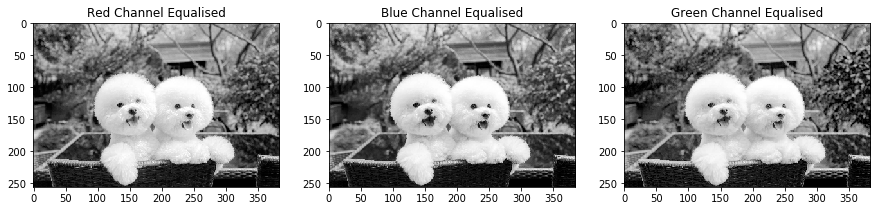

In [9]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(131)
plt.title('Red Channel Equalised')
plt.imshow(red_channel,cmap='gray')

fig.add_subplot(132)
plt.title('Blue Channel Equalised')
plt.imshow(blue_channel,cmap='gray')

fig.add_subplot(133)
plt.title('Green Channel Equalised')
plt.imshow(green_channel,cmap='gray');

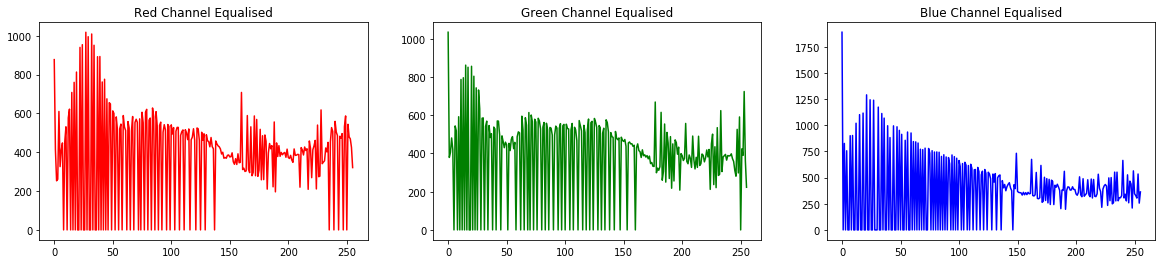

In [10]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
hist = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.title('Red Channel Equalised')
plt.plot(hist, color = 'r',alpha=1.0,label='red_channel')

fig.add_subplot(132)
hist = cv2.calcHist([equ], [1], None, [256], [0, 256])
plt.title('Green Channel Equalised')
plt.plot(hist, color = 'g',alpha=1.0,label='green_channel')

fig.add_subplot(133)
hist = cv2.calcHist([equ], [2], None, [256], [0, 256])
plt.title('Blue Channel Equalised')
plt.plot(hist, color = 'b',alpha=1.0,label='blue_channel');

**Task 3**

In [11]:
image = cv2.imread('images/Figure2-a.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.asarray(image,dtype=np.float64)

In [12]:
#Task 3.1
def cvRGB2HSV(r,g,b):
    
    #Normalising the channels
    normalise_r = r/255.0
    normalise_g = g/255.0
    normalise_b = b/255.0
    
    #Using the RGB to HSV formulas
    V = max(normalise_r,normalise_g,normalise_b)
    x_min = min(normalise_r,normalise_g,normalise_b)
    
    c = V - x_min
    
    if (c == 0):
        H = 0
    elif (V == normalise_r):
        H = (60 * ((normalise_g-normalise_b)/c) + 360) % 360
    elif (V == normalise_g):
        H = (60 * ((normalise_b-normalise_r)/c) + 120) % 360
    else :
        H = (60 * ((normalise_r-normalise_g)/c) + 240) % 360
    
    if (V == 0):
        S = 0
    else :
        S = (c/V)
    return H,S,V     

In [13]:
#Helper function to apply the formula over every pixel in the image
def imageToHSV(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            H,S,V = cvRGB2HSV(image[i,j][0],image[i,j][1],image[i,j][2])
            image[i,j][0] = H
            image[i,j][1] = S
            image[i,j][2] = V
    return image

In [ ]:
image = imageToHSV(image)
fig = plt.figure(figsize=(15,15))

fig.add_subplot(131)
plt.title('H channel')
plt.imshow(image[:,:,0])

fig.add_subplot(132)
plt.title('S channel')
plt.imshow(image[:,:,1])

fig.add_subplot(133)
plt.title('V channel')
plt.imshow(image[:,:,2]);

In [ ]:
image = cv2.imread('images/Figure2-b.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.asarray(image,dtype=np.float64)
image = imageToHSV(image)

In [ ]:
#Diving the image into five equal parts, and calculating the average value of Hue
first_hue = np.mean((image[:,0:416])[:,:,0])
second_hue = np.mean((image[:,416:832])[:,:,0])
third_hue = np.mean((image[:,832:1248])[:,:,0])
fourth_hue = np.mean((image[:,1248:1664])[:,:,0])
fifth_hue = np.mean((image[:,1664:2082])[:,:,0])

In [ ]:
print('first_hue',first_hue)
print('second_hue',second_hue)
print('third_hue',third_hue)
print('fourth_hue',fourth_hue)
print('fifth_hue',fifth_hue)

In [ ]:
plt.imshow(image[:,:,0]);
plt.title('Hue Channel - Five Hues');

**Task 4**

In [ ]:
image = cv2.imread('images/image4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cropped_cat = image[150:2650,1500:4000]
cropped_cat = cv2.resize(cropped_cat, (512,512))
cropped_cat = cv2.cvtColor(cropped_cat, cv2.COLOR_RGB2GRAY)
cropped_cat_write = cv2.imwrite('images/cropped_cat.jpg',cropped_cat)

In [ ]:
fig = plt.figure(figsize=(8,15))

fig.add_subplot(121)
plt.imshow(image);
plt.title('Original Image');

fig.add_subplot(122)
plt.imshow(cropped_cat,cmap='gray');
plt.title('Cropped & Resized');

In [ ]:
gaus_noise = np.random.normal(0, 15, cropped_cat.shape)
gaus_noise = gaus_noise.astype(np.uint8)
cropped_cat_noise = cv2.add(cropped_cat,gaus_noise)
plt.imshow(cropped_cat_noise,cmap='gray');
plt.title('Added Gaussian Noise to Cropped Cat Image');


In [ ]:
fig = plt.figure(figsize=(15,3))

fig.add_subplot(121)
histogram = cv2.calcHist(cropped_cat, [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.title('Histogram without noise');

fig.add_subplot(122)
histogram = cv2.calcHist(cropped_cat_noise, [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.title('Histogram with noise');

In [ ]:
def my_Gauss_filter(noisyImage, myGaussianKernel):  
    newImageSize = 0
    #Calculating the shape of the new image after convolution 
    for k in range(noisyImage.shape[0]):
        sum_pixels = k + myGaussianKernel.shape[0]
        if sum_pixels <= noisyImage.shape[0]:
            newImageSize += 1 
    blurred_image = np.zeros(shape=(newImageSize, newImageSize))
    
    #Applying convolution to the image
    for i in range(newImageSize):
        for j in range(newImageSize):
            current_window = noisyImage[i:i+(myGaussianKernel.shape[0]), j:j+(myGaussianKernel.shape[0])]
            blurred_image[i, j] = np.sum(np.multiply(current_window, myGaussianKernel))
    return blurred_image

In [ ]:
#Generate a Gaussian Kernel of required size & sigma values 
def getGaussianKernel(kernelSize,sig):
    kernel = np.zeros((kernelSize,kernelSize))
    for x in range(kernelSize):
        for y in range(kernelSize):
            kernel[x][y] = (1/(2*math.pi*sig**2)) * math.e ** ((-1*((x-(kernelSize-1)/2)**2+(y-(kernelSize-1)/2)**2))/(2*sig**2))  
    kernel = kernel / np.sum(kernel) 
    return kernel

In [ ]:
fig = plt.figure(figsize=(8,5))
fig.add_subplot(121)
plt.imshow(cropped_cat_noise,cmap='gray')
plt.title('Image with Noise');

fig.add_subplot(122)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,2)),cmap='gray')
plt.title('Image with Gaussian Filter');

In [ ]:
#Comparing different standard deviations, keeping the kernel constant at 7
fig = plt.figure(figsize=(12,12))

fig.add_subplot(331)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,2)),cmap='gray')
plt.title('Std Dev = 2, Kernel Size = 7');

fig.add_subplot(332)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 7');

fig.add_subplot(333)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,10)),cmap='gray')
plt.title('Std Dev = 10, Kernel Size = 7');

fig.add_subplot(334)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,15)),cmap='gray')
plt.title('Std Dev = 15, Kernel Size = 7');

fig.add_subplot(335)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,20)),cmap='gray')
plt.title('Std Dev = 20, Kernel Size = 7');

fig.add_subplot(336)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,20)),cmap='gray')
plt.title('Std Dev = 25, Kernel Size = 7');

In [ ]:
#Comparing different kernel sizes, for the same standard deviation 
fig = plt.figure(figsize=(12,12))

fig.add_subplot(331)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(3,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 3');

fig.add_subplot(332)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(5,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 5');

fig.add_subplot(333)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 7');

fig.add_subplot(334)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(9,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 9');

fig.add_subplot(335)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(12,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 12');

fig.add_subplot(336)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(15,5)),cmap='gray')
plt.title('Std Dev = 5, Kernel Size = 15');

In [ ]:
fig = plt.figure(figsize=(8,5))

fig.add_subplot(121)
plt.imshow(cv2.GaussianBlur(cropped_cat_noise, (7,7),2),cmap='gray')
plt.title('Image with openCV Gaussian');

fig.add_subplot(122)
plt.imshow(my_Gauss_filter(cropped_cat_noise,getGaussianKernel(7,2)),cmap='gray')
plt.title('Image with my Gaussian');

**Task 5**

In [ ]:
sobel = [[-1,0,1],[-2,0,2],[-1,0,1]]
sobel = np.array(sobel)

image2 = cv2.imread('images/image2.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image2 = cv2.resize(image2, (512,512))

image4 = cv2.imread('images/image4.jpg')
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
image4 = cv2.resize(image4, (512,512))

sobel_image2 = my_Gauss_filter(image2,sobel)
sobel_image4 = my_Gauss_filter(image4,sobel)

In [ ]:
fig = plt.figure(figsize=(8,5))

fig.add_subplot(121)
plt.imshow(sobel_image2,cmap='gray')
plt.title('Image 2 with Sobel');

fig.add_subplot(122)
plt.imshow(sobel_image4,cmap='gray')
plt.title('Image 4 with Sobel');

In [ ]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.imshow(sobel_image2,cmap='gray')
plt.title('Image 4 with my Sobel');

fig.add_subplot(222)
plt.imshow(cv2.Sobel(image2,cv2.CV_64F,1,0,ksize=3),cmap='gray')
plt.title('Image 4 with inbuilt Sobel');

fig.add_subplot(223)
plt.imshow(sobel_image4,cmap='gray')
plt.title('Image 2 with my Sobel');

fig.add_subplot(224)
plt.imshow(cv2.Sobel(image4,cv2.CV_64F,1,0,ksize=3),cmap='gray')
plt.title('Image 2 with inbuilt Sobel');

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(121)
fd, hog_image4 = hog(cv2.Sobel(image4,cv2.CV_64F,1,0,ksize=3), orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)

hog_image_rescaled4 = exposure.rescale_intensity(hog_image4, in_range=(0, 50))
plt.imshow(hog_image_rescaled4,cmap='gray')
plt.title('Image 4 Gradient Orientation');

fig.add_subplot(122)
fd, hog_image2 = hog(cv2.Sobel(image2,cv2.CV_64F,1,0,ksize=3), orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)

hog_image_rescaled2 = exposure.rescale_intensity(hog_image2, in_range=(0, 50))
plt.imshow(hog_image_rescaled2,cmap='gray');
plt.title('Image 2 with my Sobel');
plt.title('Image 2 Gradient Orientation');